In [ ]:
#得到自己的user angent
from selenium import webdriver
from selenium.webdriver.edge.service import Service



# 指定 Edge WebDriver 的路径
PATH = r"C:\\selenium\\msedgedriver.exe"  # 注意路径前加 r，表示原始字符串
service = Service(PATH)

# 初始化 Edge WebDriver、前往目标网址
driver = webdriver.Edge(service=service)
driver.get("https://www.nccu.edu.tw/app/home.php")  # 要進去的網址

# 等待几秒钟，方便观察页面加载情况
import time
time.sleep(5)

# 获取当前浏览器的 User-Agent
user_agent = driver.execute_script("return navigator.userAgent;")
print("User-Agent:", user_agent)


# 关闭浏览器
driver.quit()

# 使用获取到的 User-Agent
HEADERS = {
    'User-Agent': user_agent,
}


In [ ]:
#爬所有的新聞
import requests

def get_all_news():
    """爬取所有新闻"""
    base_url = "https://udn.com/api/more"
    all_news = []
    page_num = 1

    while True:
        query = f"page={page_num}&channelId=1&cate_id=0&type=breaknews"
        news_list_url = f"{base_url}?{query}"
        print(news_list_url)

        try:
            response = requests.get(news_list_url)
            response.raise_for_status()  # 检查请求是否成功
            data = response.json()  # 解析返回的 JSON 数据

            # 假设新闻列表在 'lists' 键中
            news_list = data.get('lists', [])

            # 如果返回的新闻列表为空，说明已经加载完所有数据
            if not news_list:
                print("没有更多数据")
                break

            all_news.extend(news_list)  # 将当前页的新闻添加到总列表中
            page_num += 1  # 准备加载下一页

            # 如果返回的数据中包含分页信息，可以进一步判断
            if 'has_more' in data and not data['has_more']:
                print("已经加载完所有数据")
                break

        except requests.RequestException as e:
            print(f"请求第 {page_num} 页时出错: {e}")
            print("请检查网页链接的合法性，并确保网络连接正常。")
            break  # 如果请求失败，退出循环

    return all_news

# 调用函数获取所有新闻
all_news = get_all_news()
print(all_news)

In [ ]:
# 保存为 CSV 文件
df.to_csv(r"C:\Users\user\OneDrive\Desktop\test\news.csv", index=False, encoding="utf-8")

print("CSV 文件已生成")

In [ ]:
#爬取新聞並變成csv檔
#概念就是，是當我們網頁往下滾到底部後，會觸發網頁的 JavaScript 程式，讓它透過 Ajax 動態載入，將新聞資料一直載入進來。
import requests
from selenium import webdriver
from selenium.webdriver.edge.service import Service
import time

page_num = 23  # 要爬取的页数

def get_news_list(page_num):
    """爬取新闻列表"""
    base_url = "https://udn.com/api/more"  # 修正后的 base_url

    news_list = []
    for page in range(page_num):
        channelId = 1
        cate_id = 0
        type_ = 'breaknews'
        query = f"page={page+1}&channelId={channelId}&cate_id={cate_id}&type={type_}"
        news_list_url = base_url + '?' + query
        print(news_list_url)
        
        try:
            # 使用 requests 发起请求
            response = requests.get(news_list_url)
            response.raise_for_status()  # 检查请求是否成功
            data = response.json()  # 解析返回的 JSON 数据
            news_list.extend(data.get('lists', []))  # 假设新闻列表在 'lists' 键中
        except requests.RequestException as e:
            print(f"请求第 {page+1} 页时出错: {e}")
            print("请检查网页链接的合法性，并确保网络连接正常。")
            print("如果问题仍然存在，可以稍后重试。")
            break  # 如果请求失败，退出循环

    return news_list

# 调用函数获取新闻列表
news_list = get_news_list(page_num)
print(news_list)

https://udn.com/api/more?page=1&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=2&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=3&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=4&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=5&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=6&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=7&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=8&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=9&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=10&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=11&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=12&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=13&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=14&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page

In [23]:
#生成dataframe

import pandas as pd
# 将 JSON 数据转换为 DataFrame
df = pd.DataFrame(news_list)

# 提取所有標題，並將缺失值（NaN）排除
text = " ".join(df['title'].dropna())

In [24]:
#生成文字雲
import jieba
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [25]:
# 定义停用词
stopwords = """的
了
在
是
我
有
和
不
人
都
一
對
說
要
來
這
他
也
為
以
上
下
為什麼
所以
那
把
它
你
她
我們的
他們
他們的
來自
可以
去
這些
會
還
的
為了
如果
但
之後
當
會
此
其
從
等
更多
因
己
後
變
與
又
"""


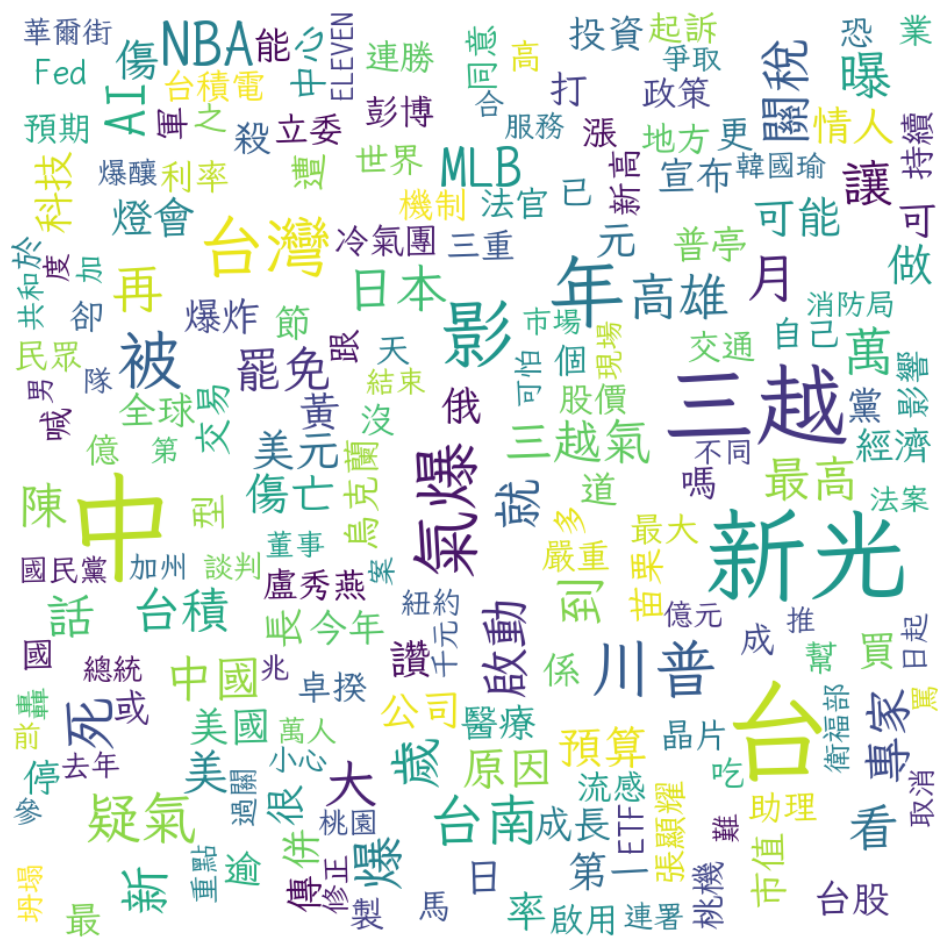

In [26]:
#生成
# 将停用词保存到文件
with open("stopwords.txt", "w", encoding="utf-8") as file:
    file.write(stopwords.strip())

# 加载停用词
stopwords_path = "stopwords.txt"
def load_stopwords(stopwords_path):
    with open(stopwords_path, 'r', encoding='utf-8') as f:
        return set(f.read().splitlines())
stopwords = load_stopwords(stopwords_path)


# 使用 jieba 进行中文分词并过滤停用词
segmented_text = " ".join([word for word in jieba.cut(text) if word not in stopwords])

# 设置中文字体路径
font_path = r"C:\python\字體\LxgwWenKai-main\fonts\TTF\LXGWWenKaiMono-Regular.ttf"

# 生成文字云
wordcloud = WordCloud(
    font_path=font_path,
    width=800,  # 加大尺寸以获得更好的效果
    height=800,
    background_color='white',
    mask=None,  # 如果需要使用遮罩，可以取消注释并设置为 taiwan_mask
    contour_width=2,
    contour_color='gray',
    min_font_size=10,
    max_font_size=100,
    prefer_horizontal=0.7,
    collocations=False
).generate(segmented_text)

# 显示文字云
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 保存为图片文件
wordcloud.to_file("wordcloud.png")